In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drug_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on="Mouse ID")

# Display the data table for preview
drug_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_data = drug_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_data = pd.DataFrame(mean_tumor_data)
mean_tumor_data = mean_tumor_data.reset_index()
# Preview DataFrame
mean_tumor_data.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_data = drug_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
sem_tumor_data = pd.DataFrame(sem_tumor_data)

sem_tumor_data = sem_tumor_data.reset_index()

# Preview DataFrame

sem_tumor_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_data_pivot = mean_tumor_data.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]

sem_tumor_data_pivot = sem_tumor_data.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tumor_data_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
sem_tumor_data_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


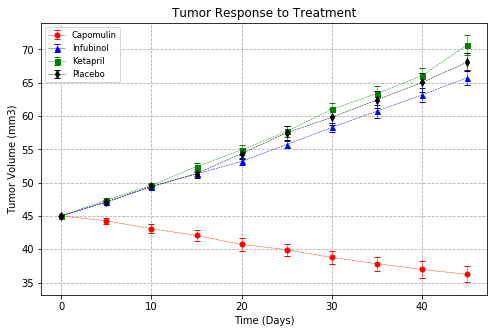

In [6]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))

plt.errorbar(mean_tumor_data_pivot.index, mean_tumor_data_pivot["Capomulin"], yerr = sem_tumor_data_pivot["Capomulin"], marker="o", color="r", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Capomulin")
plt.errorbar(mean_tumor_data_pivot.index, mean_tumor_data_pivot["Infubinol"], yerr = sem_tumor_data_pivot["Infubinol"], marker="^", color="b", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Infubinol")
plt.errorbar(mean_tumor_data_pivot.index, mean_tumor_data_pivot["Ketapril"], yerr = sem_tumor_data_pivot["Ketapril"], marker="s", color="g", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Ketapril")
plt.errorbar(mean_tumor_data_pivot.index, mean_tumor_data_pivot["Placebo"], yerr = sem_tumor_data_pivot["Placebo"], marker="d", color="k", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Placebo")


plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Tumor.png")

plt.show()

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Metastatic_sites_mean = drug_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
Metastatic_sites_mean = pd.DataFrame(Metastatic_sites_mean)

# Preview DataFrame
Metastatic_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_sites_sem = drug_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
Metastatic_sites_sem = pd.DataFrame(Metastatic_sites_sem)

# Preview DataFrame
Metastatic_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
Metastatic_sites_mean = Metastatic_sites_mean.reset_index()
Metastatic_sites_mean_pivot = Metastatic_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

Metastatic_sites_sem = Metastatic_sites_sem.reset_index()
Metastatic_sites_sem_pivot = Metastatic_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
Metastatic_sites_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
Metastatic_sites_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


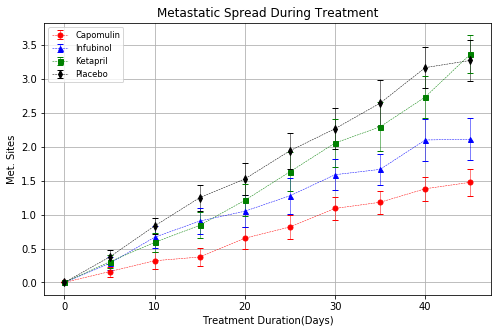

In [12]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(8,5))
plt.errorbar(Metastatic_sites_mean_pivot.index, Metastatic_sites_mean_pivot["Capomulin"], yerr = Metastatic_sites_sem_pivot["Capomulin"], marker="o", color="r", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Capomulin")
plt.errorbar(Metastatic_sites_mean_pivot.index, Metastatic_sites_mean_pivot["Infubinol"], yerr = Metastatic_sites_sem_pivot["Infubinol"], marker="^", color="b", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Infubinol")
plt.errorbar(Metastatic_sites_mean_pivot.index, Metastatic_sites_mean_pivot["Ketapril"], yerr = Metastatic_sites_sem_pivot["Ketapril"], marker="s", color="g", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Ketapril")
plt.errorbar(Metastatic_sites_mean_pivot.index, Metastatic_sites_mean_pivot["Placebo"], yerr = Metastatic_sites_sem_pivot["Placebo"], marker="d", color="k", markersize=5, linestyle="dashed", linewidth=0.50, capsize=3, label="Placebo")


plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration(Days)")
plt.title("Metastatic Spread During Treatment")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic.png")

# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_data_count = drug_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_data_count = pd.DataFrame(survival_data_count)
survival_data_count = survival_data_count.reset_index()

survival_data_count = survival_data_count.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
survival_data_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_data_count_pivot = survival_data_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_data_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


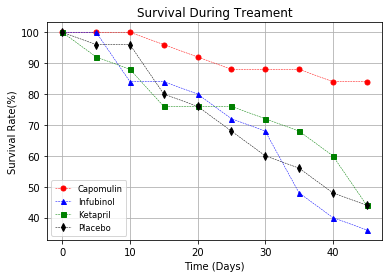

In [15]:
# Generate the Plot (Accounting for percentages)

plt.plot(survival_data_count_pivot.index, survival_data_count_pivot["Capomulin"]/25*100, marker="o", color="r", markersize=5, linestyle="dashed", linewidth=0.50, label="Capomulin")
plt.plot(survival_data_count_pivot.index, survival_data_count_pivot["Infubinol"]/25*100, marker="^", color="b", markersize=5, linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.plot(survival_data_count_pivot.index, survival_data_count_pivot["Ketapril"]/25*100, marker="s", color="g", markersize=5, linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.plot(survival_data_count_pivot.index, survival_data_count_pivot["Placebo"]/25*100, marker="d", color="k", markersize=5, linestyle="dashed", linewidth=0.50, label="Placebo")

plt.title("Survival During Treament")
plt.ylabel("Survival Rate(%)")
plt.xlabel("Time (Days)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid(True)

# Save the Figure
plt.savefig("MouseCount.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
tumor_percent_change = ((mean_tumor_data_pivot.iloc[-1] - mean_tumor_data_pivot.iloc[0])/mean_tumor_data_pivot.iloc[0]) * 100

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

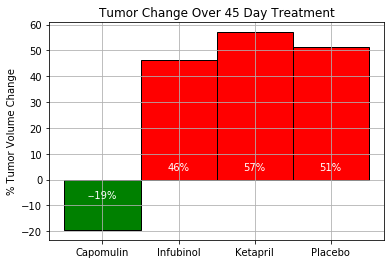

In [30]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (tumor_percent_change["Capomulin"],
                  tumor_percent_change["Infubinol"],
                  tumor_percent_change["Ketapril"],
                  tumor_percent_change["Placebo"])
percent_changes                
# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind = np.arange(len(percent_changes))
width=1

rectsPass = ax.bar(ind[0], percent_changes[0],width, color="green", ec="black")
rectsFail = ax.bar(ind[1:], percent_changes[1:],width, color="red", ec="black")


# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_autoscaley_on(False)
ax.grid()


# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,3,
               '%d%%' % int(height),
               ha="center", va="bottom", color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,-8,
               '-%d%%' % int(height), ha="center", va="bottom", color="white")

# Call functions to implement the function calls
autolabelFail(rectsFail)
autolabelPass(rectsPass)



# Save the Figure
plt.savefig("crazyplot.png")

# Show the Figure

plt.show()